<a href="https://colab.research.google.com/github/brenolyES/atv2_brenoly_ML/blob/main/Brenoly_Atividade_com_chatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importação dos dados

In [ ]:
#importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
url = "https://gist.githubusercontent.com/brenolyES/6f34e3f24dfe4992ca71c8bdeee4fa3f/raw/a31b3d2acd6db4ae8bcc954f3d7a275f3b35f46a/gistfile1.txt"
df = pd.read_csv(url, sep=';')


Importando a base e separando as colunas pela virgula.

In [ ]:
#analisando as primeiras entradas do df
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [ ]:
df["position"].value_counts()

CB               2296
GK               1884
ST               1757
CDM|CM           1546
LB                695
                 ... 
LB|RW               1
LWB|CM|CAM|LW       1
RB|RW|LW            1
CB|CF               1
CB|RM|LM            1
Name: position, Length: 232, dtype: int64

Pode-se obersevar que um jogador pode ter mais do que uma posição dentro do jogo e da sua função no time.

In [ ]:
df.groupby('position').mean()

,player_id,overall,age,hits,potential
position,,,,,
CAM,231387.455357,65.602679,24.575893,0.959821,71.758929
CAM|CF,230731.895833,67.645833,24.979167,5.416667,73.604167
CAM|CF|LW,218185.500000,69.700000,26.300000,9.700000,75.100000
CAM|CF|RW,224962.833333,68.500000,24.500000,2.166667,76.166667
CAM|LW,217544.500000,70.477273,26.045455,8.159091,74.772727
...,...,...,...,...,...
ST|RM|RW,220465.794872,68.230769,25.948718,2.897436,72.256410
ST|RW,226349.421488,66.561983,24.966942,2.958678,72.520661
ST|RWB|RM|RW,236393.666667,64.000000,28.000000,0.000000,66.333333


A tabela resultante mostra a média de cada variável numérica para cada combinação de posições listadas na coluna "position". Por exemplo, para jogadores que têm a posição listada como "CAM", a média de overall é 65.6, a média de idade é 24.6, a média de hits é 0.96, e a média de potential é 71.76. As categorias de posição foram criadas com base nas informações da coluna "position", que contém várias posições separadas por "|". Cada combinação única de posições se tornou uma categoria separada.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    17981 non-null  int64 
 1   name         17981 non-null  object
 2   nationality  17981 non-null  object
 3   position     17981 non-null  object
 4   overall      17981 non-null  int64 
 5   age          17981 non-null  int64 
 6   hits         17981 non-null  int64 
 7   potential    17981 non-null  int64 
 8   team         17981 non-null  object
dtypes: int64(5), object(4)
memory usage: 1.2+ MB


Podemos observar que essa base nao possue nenhum valor nulo entre os dados;

In [ ]:
df.describe()

,player_id,overall,age,hits,potential
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000
mean,220912.660531,67.274345,26.311440,2.689450,71.738057
std,27738.072671,5.924392,4.556077,10.846286,5.961968
min,41.000000,56.000000,17.000000,0.000000,57.000000
25%,204881.000000,63.000000,23.000000,0.000000,67.000000
50%,226753.000000,67.000000,26.000000,0.000000,71.000000
75%,241587.000000,71.000000,30.000000,2.000000,76.000000
max,256469.000000,94.000000,43.000000,371.000000,95.000000


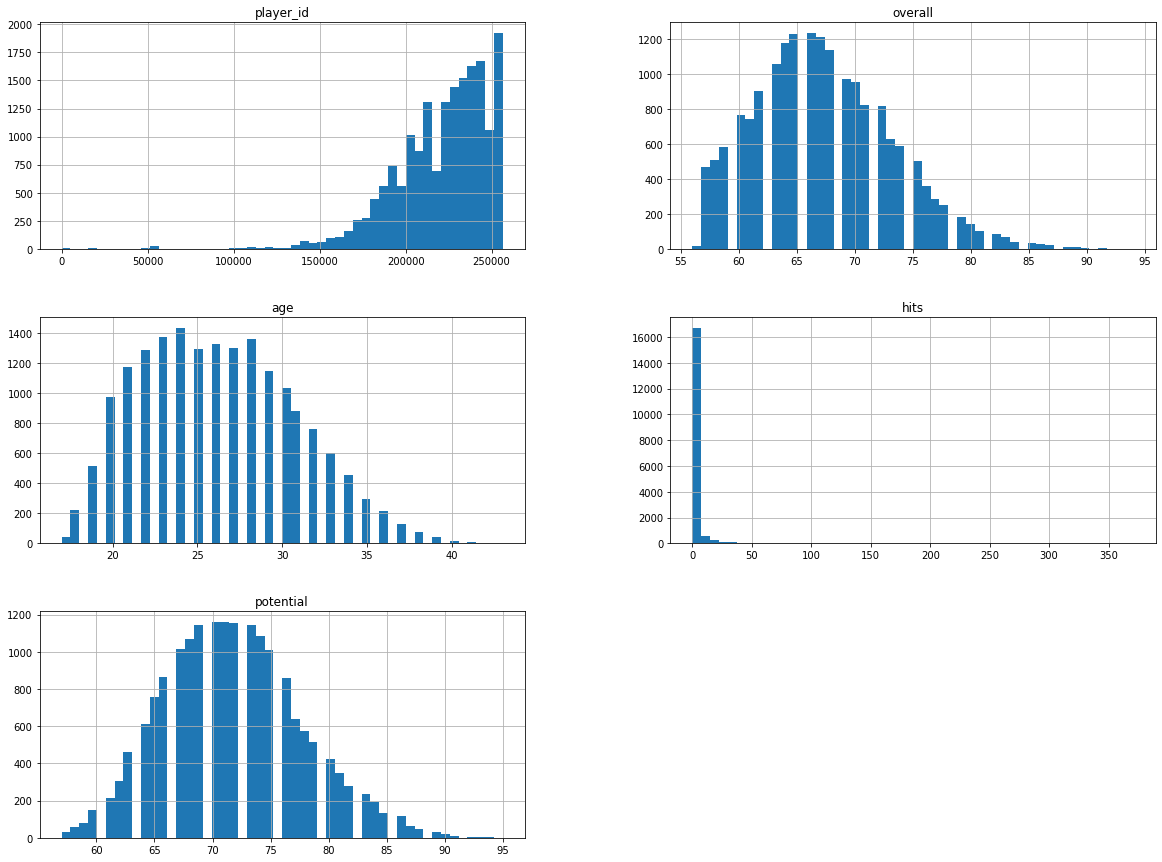

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Pode mos observar que a maioria dos jogadores tem o overall entre 65 a 70, a maioria dos jogadores estao entre 23 a 25 anos, poucos jogadores tem a taxa de acerto alta e que a maioria dos jogadores estao com potencial entre 65 a 75.

## **Usando o CrossValidation no modelo**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Selecionar os recursos de entrada (X) e a variável alvo (y)
X = df[['age', 'hits', 'potential']]
y = df['overall']

# Definir o número de folds para a validação cruzada k-fold
n_folds = 5

# Inicializar o objeto de validação cruzada k-fold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Inicializar o modelo de regressão linear
model = LinearRegression()

# Realizar a validação cruzada k-fold
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f'Fold {fold+1}:')
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    print(f'R2 score: {score:.2f}')


Fold 1:
R2 score: 0.81
Fold 2:
R2 score: 0.81
Fold 3:
R2 score: 0.80
Fold 4:
R2 score: 0.80
Fold 5:
R2 score: 0.81


Os resultados mostram o desempenho do modelo em cada uma das cinco dobras (folds) do conjunto de dados durante a validação cruzada. A medida de desempenho usada foi o R2 score, que é uma medida de quão bem o modelo se ajusta aos dados.

Os valores de R2 score variam de 0 a 1, onde 0 indica que o modelo não explica nada da variância dos dados, e 1 indica que o modelo explica toda a variância dos dados. Nesse caso, os resultados indicam que o modelo tem um bom desempenho, com valores de R2 score variando entre 0.80 e 0.81 em todas as dobras.

## **Usando o GridSearch no modelo**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

# Define the pipeline with StandardScaler() and LinearRegression()
model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# Define the hyperparameters to be tested
param_grid = {'linearregression__fit_intercept': [True, False]}

# Create a GridSearch object with the model and the hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Train the model with GridSearch
grid_search.fit(X, y)

# Get the best set of hyperparameters and the best score
print(grid_search.best_params_)
print(grid_search.best_score_)


{'linearregression__fit_intercept': False}
-3.8506772143326997


Esse resultado indica que, dentre os hiperparâmetros testados, o melhor conjunto de hiperparâmetros para o modelo de regressão linear é aquele em que o hiperparâmetro fit_intercept é definido como False. Além disso, o valor -3.8506772143326997 representa o melhor score obtido pelo modelo com esse conjunto de hiperparâmetros, durante a busca do GridSearch. Esses resultados indicam que, de acordo com a métrica usada (provavelmente R², já que o modelo é de regressão linear), o modelo obteve um desempenho melhor quando o hiperparâmetro fit_intercept foi definido como False.